Je mets juste le script de roland sur notebook

Ce code sert à définir le chemin racine du projet, je suis le seul à avoir ce problème de lecture de fichier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys

# Définir le chemin racine du projet
project_root = os.path.abspath("/Users/sacharatsavong/Desktop/Python/projet_python_roland_sacha")
sys.path.append(project_root)

# Changer le directory courant
os.chdir(project_root)

On prépare les données des médailles par pays en rajoutant les données des jeux de Tokyo et de Paris qui n'existent pas sur le fichier initial. 

In [5]:
#On s'occupe de la partie médailles en premier (la + longue)
data = "data/raw/athlete_events.csv"
df_athlete = pd.read_csv(data)
#On enlève les athlètes sans médailles
df_athlete = df_athlete.dropna(subset = "Medal")
df_filtre = df_athlete[df_athlete["Games"].str.contains("Summer", na=False)]


#On a le tableau des médailles / pays / édition
df_medals = medal_counts = df_filtre.groupby(['Year', 'Team', 'Medal']).size().reset_index(name='Count')

df_2024 = pd.read_csv("data/raw/paris-2024-results-medals-oly-eng.csv", sep = ";", encoding = "utf-8", on_bad_lines = "skip")
df_2024["Year"] = pd.to_datetime(df_2024["Medal_date"]).dt.year
medal_counts_2024 = df_2024.groupby(['Year', 'Country', 'Medal_type']).size().reset_index(name='Count')
medal_counts_2024 = medal_counts_2024.rename(columns={"Medal_type": "Medal", "Country" : "Team"})

df_jeux = pd.concat([df_medals, medal_counts_2024], ignore_index= True)

df_tokyo = pd.read_csv("data/raw/Tokyo Olympics  2021 dataset.csv", sep = ",", encoding = "utf-8", on_bad_lines = "skip") 

df_tokyo = df_tokyo.rename(columns={"Gold Medal": "Gold", "Bronze Medal" : "Bronze", "Silver Medal" : "Silver", "Team/NOC" : "Team"})
df_tokyo["Year"] = 2021

df_tokyo = df_tokyo.drop(["Total", "Rank by Total", "Rank", "NOCCode"], axis=1)
df_tokyo["Team"] = df_tokyo["Team"].replace("United States of America", "United States")

df_long = df_tokyo.melt(
    id_vars=["Team", "Year"],      # colonnes qui restent fixes
    value_vars=["Gold", "Silver", "Bronze"],   # colonnes à transformer
    var_name="Medal",             # nom de la nouvelle colonne
    value_name="Count"                # nombre de médailles
)

#On a le df des médailles pr toutes les éditions c bon
df_all_games = pd.concat([df_jeux, df_long], ignore_index = True)
df_all_games = df_all_games.sort_values(by="Year")

In [8]:
df_all_games.head()

,Year,Team,Medal,Count
0,1896,Australia,Gold,2
30,1896,United States,Silver,7
28,1896,United States,Bronze,2
27,1896,Switzerland,Silver,2
26,1896,Switzerland,Gold,1


On crée le csv nettoyé

In [4]:
df_all_games.to_csv("data/raw/df_all_games.csv", index=False)

On s'amuse à faire un graphique sur les 5 pays avec le plus de médailles

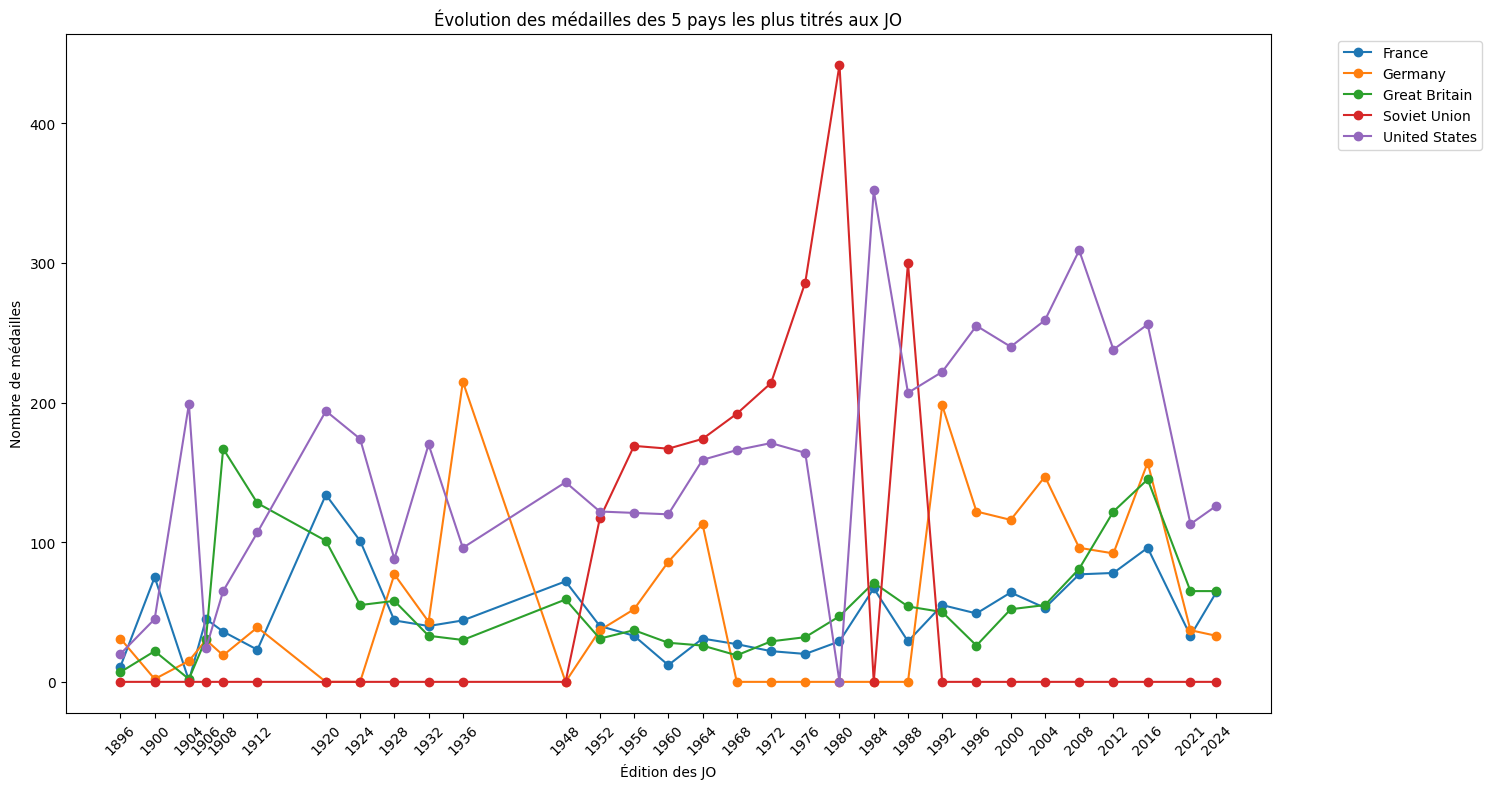

In [ ]:
# Somme des médailles par pays
top_countries = df_all_games.groupby('Team')['Count'].sum().sort_values(ascending=False).head(5).index

# Filtrer le DataFrame pour ne garder que ces pays
df_top = df_all_games[df_all_games['Team'].isin(top_countries)]
df_top

df_agg = df_top.groupby(['Year', 'Team'])['Count'].sum().reset_index()
df_pivot = df_agg.pivot(index='Year', columns='Team', values='Count').fillna(0)

plt.figure(figsize=(15,8))

for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)  # ajoute des points pour chaque JO

plt.title("Évolution des médailles des 5 pays les plus titrés aux JO")
plt.xlabel("Édition des JO")
plt.ylabel("Nombre de médailles")

# Mettre les années exactes comme ticks
plt.xticks(df_pivot.index, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

J'essaye de convertir les noms de pays de l'anglais aux français pour faciliter le merge avec les autre datasets

In [14]:
df_all_games['Team'].unique()

array(['Australia', 'United States', 'Switzerland', 'Hungary', 'Greece-1',
       'Greece', 'Great Britain/Germany', 'Great Britain', 'Germany',
       'Australia/Great Britain', 'Austria', 'Denmark',
       'Ethnikos Gymnastikos Syllogos', 'France', 'Martha-1', 'Mascotte',
       'Mignon-3', 'Minerva Amsterdam', 'Norway', 'Moseley Wanderers',
       'Netherlands', 'Nina Claire-2', 'Luxembourg',
       'Ludwigshafener Ruder Verein-1', 'India', 'Lerina', 'Laurea-1',
       'Italy', 'Gwendoline-2', 'Great Britain-2', 'Great Britain-1',
       'Libellule de Paris', 'Olle', 'Pupilles de Neptune de Lille #2-1',
       'Vesper Boat Club', 'Upton Park FC', 'Univ. of Brussels',
       'United States/Great Britain', 'United States/France',
       'Union des Socits Franais de Sports Athletiques', 'USFSA',
       'Turquoise-1', 'Tritons Lillois-2', 'Sweden', 'Spain',
       'Societ Nautique de la Marne-1', 'Scotia', 'Scamasaxe-3',
       'Scamasaxe-2', 'Sarcelle-3', 'Royal Club Nautique de Gand',

In [16]:
df_all_games['Team'] = df_all_games['Team'].replace({
    'Austria' : 'Autriche',
    'Belgium' : 'Belgique',
    'Bulgaria' : 'Bulgarie',
    'Switzerland' : 'Suisse',
    'Cyprus' : 'Chypre',
    'Czechia' : 'Tchéquie',
    'Germany' : 'Allemagne',
    'Denmark' : 'Danemark',
    'Estonia' : 'Estonie',
    'Greece' : 'Grèce',
    'Spain' : 'Espagne',
    'Finland' : 'Finlande',
    'Croatia' : 'Croatie',
    'Hungary' : 'Hongrie',
    'Ireland' : 'Irlande',
    'Iceland' : 'Islande',
    'Italy' : 'Italie',
    'Lithuania' : 'Lituanie',
    'Luxembourg' : 'Luxembourg',
    'Latvia' : 'Lettonie',
    'Netherlands' : 'Pays-Bas',
    'Malta' : 'Malte',
    'Norway' : 'Norvège',
    'Poland' : 'Pologne',
    'Portugal' : 'Portugal',
    'Romania' : 'Roumanie',
    'Sweden' : 'Suède',
    'Slovenia' : 'Slovénie',
    'Slovakia' : 'Slovaquie',
})

In [17]:
liste_pays = ['Autriche', 'Belgique', 'Bulgarie', 'Suisse', 'Chypre', 'Tchéquie', 'Allemagne', 'Danemark', 'Estonie', 'Grèce', 'Espagne', 'Finlande', 'Croatie', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Lituanie', 'Luxembourg', 'Lettonie', 'Pays-Bas', 'Malte', 'Norvège', 'Pologne', 'Portugal', 'Roumanie', 'Suède', 'Slovénie', 'Slovaquie']

In [21]:
df_all_games_small = df_all_games[df_all_games['Team'].isin(liste_pays)]
df_all_games_small = df_all_games_small[df_all_games_small['Year'] >= 2015]

In [23]:
df_all_games_small.tail()

,Year,Team,Medal,Count
3385,2024,Pays-Bas,Bronze Medal,12
3378,2024,Lituanie,Silver Medal,2
3377,2024,Lituanie,Bronze Medal,2
3401,2024,Pologne,Silver Medal,4
3425,2024,Espagne,Gold Medal,5


In [27]:
dep_small = pd.read_csv("data/raw/depenses_sports_UE.csv")

In [28]:
df_all_games_small_merged = df_all_games_small \
    .merge(dep_small, left_on=['Year', 'Team'], right_on=['TIME_PERIOD', 'Entité géopolitique (déclarante)'])

In [34]:
df_all_games_small_merged.rename(columns={"OBS_VALUE": "Dépenses publiques (en part du PIB)"}, inplace=True)
df_all_games_small_merged = df_all_games_small_merged.sort_values(by=["Team", "Year"])

In [37]:
df_all_games_small_merged.iloc[:20,:]

,Year,Team,Medal,Count,Entité géopolitique (déclarante),TIME_PERIOD,Dépenses publiques (en part du PIB)
51,2016,Allemagne,Bronze,67,Allemagne,2016,2.0
52,2016,Allemagne,Gold,47,Allemagne,2016,2.0
53,2016,Allemagne,Silver,43,Allemagne,2016,2.0
58,2021,Allemagne,Silver,11,Allemagne,2021,2.0
114,2021,Allemagne,Bronze,16,Allemagne,2021,2.0
121,2021,Allemagne,Gold,10,Allemagne,2021,2.0
33,2016,Autriche,Bronze,2,Autriche,2016,2.5
83,2021,Autriche,Gold,1,Autriche,2021,2.5
87,2021,Autriche,Silver,1,Autriche,2021,2.5
88,2021,Autriche,Bronze,5,Autriche,2021,2.5
